In [120]:
import pickle
import pandas as pd
import numpy as np
import datetime  
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
import folium
from folium.plugins import HeatMap
from math import floor
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDRegressor, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, classification_report, confusion_matrix
from sqlalchemy import create_engine
from sqlalchemy import text
from sklearn.cluster import KMeans
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import DBSCAN, OPTICS
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
import csv
import time
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV

In [121]:
df = pd.read_csv('Manhattan_Noise.csv')
df

Unnamed: 0  Unique Key         Created Date          Closed Date   
0                1    35139300  2017-01-01 00:03:41  2017-01-01 03:49:13  \
1               14    35136997  2017-01-01 00:14:06  2017-01-01 02:22:14   
2               20    35138402  2017-01-01 00:17:37  2017-01-01 06:02:22   
3               23    35140901  2017-01-01 00:18:10  2017-01-01 05:43:30   
4               27    35138792  2017-01-01 00:20:10  2017-01-01 01:30:49   
...            ...         ...                  ...                  ...   
139632      446231    38057939  2017-12-30 23:54:20  2017-12-31 03:56:50   
139633      446235    38058042  2017-12-30 23:55:59  2017-12-31 02:31:10   
139634      446240    38062803  2017-12-30 23:58:23  2017-12-31 12:31:59   
139635      446241    38060662  2017-12-30 23:59:44  2017-12-31 12:54:27   
139636      446242    38062644  2017-12-30 23:59:49  2017-12-31 05:47:53   

                 Complaint Type        Descriptor               Location Type   
0           Noise - Residential  Loud Music/Party  Residential Building/House  \
1            Noise - Commercial  Loud Music/Party            Store/Commercial   
2           Noise - Residential  Loud Music/Party  Residential Building/House   
3           Noise - Residential  Loud Music/Party  Residential Building/House   
4       Noise - Street/Sidewalk  Loud Music/Party             Street/Sidewalk   
...                         ...               ...                         ...   
139632       Noise - Commercial  Loud Music/Party            Store/Commercial   
139633      Noise - Residential  Banging/Pounding  Residential Building/House   
139634      Noise - Residential  Loud Music/Party  Residential Building/House   
139635      Noise - Residential  Banging/Pounding  Residential Building/House   
139636      Noise - Residential  Loud Music/Party  Residential Building/House   

        Incident Zip     Incident Address      Street Name  ...   
0            10040.0     60 THAYER STREET    THAYER STREET  ...  \
1            10011.0   235 WEST 23 STREET   WEST 23 STREET  ...   
2            10031.0  520 WEST 139 STREET  WEST 139 STREET  ...   
3            10027.0  128 WEST 128 STREET  WEST 128 STREET  ...   
4            10019.0                  NaN              NaN  ...   
...              ...                  ...              ...  ...   
139632       10031.0        3660 BROADWAY         BROADWAY  ...   
139633       10027.0  200 WEST 131 STREET  WEST 131 STREET  ...   
139634       10040.0      97 ARDEN STREET     ARDEN STREET  ...   
139635       10025.0   310 WEST 95 STREET   WEST 95 STREET  ...   
139636       10031.0  598 WEST 152 STREET  WEST 152 STREET  ...   

       X Coordinate (State Plane) Y Coordinate (State Plane)   
0                       1004393.0                   253922.0  \
1                        985149.0                   210546.0   
2                        997751.0                   238682.0   
3                        999451.0                   234426.0   
4                        990833.0                   218234.0   
...                           ...                        ...   
139632                   998760.0                   241804.0   
139633                   999270.0                   235411.0   
139634                  1004010.0                   254128.0   
139635                   991394.0                   228839.0   
139636                   998909.0                   241948.0   

       Open Data Channel Type   Latitude  Longitude   
0                      MOBILE  40.863609 -73.927177  \
1                       PHONE  40.744577 -73.996756   
2                      ONLINE  40.821792 -73.951220   
3                      ONLINE  40.810108 -73.945088   
4                       PHONE  40.765676 -73.976235   
...                       ...        ...        ...   
139632                 MOBILE  40.830360 -73.947568   
139633                  PHONE  40.812812 -73.945739   
139634                 ONLINE  40.864175 -73.928561  

In [122]:
df = df.drop(columns=["Date","Unnamed: 0","Unique Key"])

In [123]:
df

Created Date          Closed Date           Complaint Type   
0       2017-01-01 00:03:41  2017-01-01 03:49:13      Noise - Residential  \
1       2017-01-01 00:14:06  2017-01-01 02:22:14       Noise - Commercial   
2       2017-01-01 00:17:37  2017-01-01 06:02:22      Noise - Residential   
3       2017-01-01 00:18:10  2017-01-01 05:43:30      Noise - Residential   
4       2017-01-01 00:20:10  2017-01-01 01:30:49  Noise - Street/Sidewalk   
...                     ...                  ...                      ...   
139632  2017-12-30 23:54:20  2017-12-31 03:56:50       Noise - Commercial   
139633  2017-12-30 23:55:59  2017-12-31 02:31:10      Noise - Residential   
139634  2017-12-30 23:58:23  2017-12-31 12:31:59      Noise - Residential   
139635  2017-12-30 23:59:44  2017-12-31 12:54:27      Noise - Residential   
139636  2017-12-30 23:59:49  2017-12-31 05:47:53      Noise - Residential   

              Descriptor               Location Type  Incident Zip   
0       Loud Music/Party  Residential Building/House       10040.0  \
1       Loud Music/Party            Store/Commercial       10011.0   
2       Loud Music/Party  Residential Building/House       10031.0   
3       Loud Music/Party  Residential Building/House       10027.0   
4       Loud Music/Party             Street/Sidewalk       10019.0   
...                  ...                         ...           ...   
139632  Loud Music/Party            Store/Commercial       10031.0   
139633  Banging/Pounding  Residential Building/House       10027.0   
139634  Loud Music/Party  Residential Building/House       10040.0   
139635  Banging/Pounding  Residential Building/House       10025.0   
139636  Loud Music/Party  Residential Building/House       10031.0   

           Incident Address      Street Name    Cross Street 1   
0          60 THAYER STREET    THAYER STREET    SHERMAN AVENUE  \
1        235 WEST 23 STREET   WEST 23 STREET          7 AVENUE   
2       520 WEST 139 STREET  WEST 139 STREET  AMSTERDAM AVENUE   
3       128 WEST 128 STREET  WEST 128 STREET      LENOX AVENUE   
4                       NaN              NaN               NaN   
...                     ...              ...               ...   
139632        3660 BROADWAY         BROADWAY   WEST 151 STREET   
139633  200 WEST 131 STREET  WEST 131 STREET          7 AVENUE   
139634      97 ARDEN STREET     ARDEN STREET      DONGAN PLACE   
139635   310 WEST 95 STREET   WEST 95 STREET   WEST END AVENUE   
139636  598 WEST 152 STREET  WEST 152 STREET  AMSTERDAM AVENUE   

                       Cross Street 2  ...    Borough   
0                            BROADWAY  ...  MANHATTAN  \
1                            8 AVENUE  ...  MANHATTAN   
2                      HAMILTON PLACE  ...  MANHATTAN   
3                            7 AVENUE  ...  MANHATTAN   
4                                 NaN  ...  MANHATTAN   
...                               ...  ...        ...   
139632                WEST 152 STREET  ...  MANHATTAN   
139633                       8 AVENUE  ...  MANHATTAN   
139634                       BROADWAY  ...  MANHATTAN   
139635  HENRY HUDSON PARKWAY ET 11 SB  ...  MANHATTAN   
139636                       BROADWAY  ...  MANHATTAN   

       X Coordinate (State Plane) Y Coordinate (State Plane)   
0                       1004393.0                   253922.0  \
1                        985149.0                   210546.0   
2                        997751.0                   238682.0   
3                        999451.0                   234426.0   
4                        990833.0                   218234.0   
...                           ...                        ...   
139632                   998760.0                   241804.0   
139633                   999270.0                   235411.0   
139634                  1004010.0                   254128.0   
139635                   991394.0                   228839.0   
139636                   998909.0                   241948.0   

  

In [124]:
df.isna().sum()

Created Date                           0
Closed Date                          779
Complaint Type                         0
Descriptor                             0
Location Type                      28982
Incident Zip                         270
Incident Address                   19825
Street Name                        19825
Cross Street 1                     19601
Cross Street 2                     19514
Intersection Street 1             119879
Intersection Street 2             119879
Address Type                          11
City                                 270
Resolution Action Updated Date       659
BBL                                26812
Borough                                0
X Coordinate (State Plane)           911
Y Coordinate (State Plane)           911
Open Data Channel Type                 0
Latitude                             911
Longitude                            911
Location                             911
Hour                                   0
Month           

In [125]:
df['Latitude'] = df['Latitude'].fillna(df['Latitude'].mean())
df['Longitude'] = df['Longitude'].fillna(df['Longitude'].mean())

### Filling missing values was more beneficial than dropping all rows containing na values

In [126]:
df.isna().sum()

Created Date                           0
Closed Date                          779
Complaint Type                         0
Descriptor                             0
Location Type                      28982
Incident Zip                         270
Incident Address                   19825
Street Name                        19825
Cross Street 1                     19601
Cross Street 2                     19514
Intersection Street 1             119879
Intersection Street 2             119879
Address Type                          11
City                                 270
Resolution Action Updated Date       659
BBL                                26812
Borough                                0
X Coordinate (State Plane)           911
Y Coordinate (State Plane)           911
Open Data Channel Type                 0
Latitude                               0
Longitude                              0
Location                             911
Hour                                   0
Month           

In [127]:
df['Weekend'] = df['Day of Week'].apply(lambda x: 1 if x > 5 else 0)

In [128]:
df['Weekday'] = df['Day of Week'].apply(lambda x: 1 if x <= 5 else 0)

In [129]:
df

Created Date          Closed Date           Complaint Type   
0       2017-01-01 00:03:41  2017-01-01 03:49:13      Noise - Residential  \
1       2017-01-01 00:14:06  2017-01-01 02:22:14       Noise - Commercial   
2       2017-01-01 00:17:37  2017-01-01 06:02:22      Noise - Residential   
3       2017-01-01 00:18:10  2017-01-01 05:43:30      Noise - Residential   
4       2017-01-01 00:20:10  2017-01-01 01:30:49  Noise - Street/Sidewalk   
...                     ...                  ...                      ...   
139632  2017-12-30 23:54:20  2017-12-31 03:56:50       Noise - Commercial   
139633  2017-12-30 23:55:59  2017-12-31 02:31:10      Noise - Residential   
139634  2017-12-30 23:58:23  2017-12-31 12:31:59      Noise - Residential   
139635  2017-12-30 23:59:44  2017-12-31 12:54:27      Noise - Residential   
139636  2017-12-30 23:59:49  2017-12-31 05:47:53      Noise - Residential   

              Descriptor               Location Type  Incident Zip   
0       Loud Music/Party  Residential Building/House       10040.0  \
1       Loud Music/Party            Store/Commercial       10011.0   
2       Loud Music/Party  Residential Building/House       10031.0   
3       Loud Music/Party  Residential Building/House       10027.0   
4       Loud Music/Party             Street/Sidewalk       10019.0   
...                  ...                         ...           ...   
139632  Loud Music/Party            Store/Commercial       10031.0   
139633  Banging/Pounding  Residential Building/House       10027.0   
139634  Loud Music/Party  Residential Building/House       10040.0   
139635  Banging/Pounding  Residential Building/House       10025.0   
139636  Loud Music/Party  Residential Building/House       10031.0   

           Incident Address      Street Name    Cross Street 1   
0          60 THAYER STREET    THAYER STREET    SHERMAN AVENUE  \
1        235 WEST 23 STREET   WEST 23 STREET          7 AVENUE   
2       520 WEST 139 STREET  WEST 139 STREET  AMSTERDAM AVENUE   
3       128 WEST 128 STREET  WEST 128 STREET      LENOX AVENUE   
4                       NaN              NaN               NaN   
...                     ...              ...               ...   
139632        3660 BROADWAY         BROADWAY   WEST 151 STREET   
139633  200 WEST 131 STREET  WEST 131 STREET          7 AVENUE   
139634      97 ARDEN STREET     ARDEN STREET      DONGAN PLACE   
139635   310 WEST 95 STREET   WEST 95 STREET   WEST END AVENUE   
139636  598 WEST 152 STREET  WEST 152 STREET  AMSTERDAM AVENUE   

                       Cross Street 2  ... Y Coordinate (State Plane)   
0                            BROADWAY  ...                   253922.0  \
1                            8 AVENUE  ...                   210546.0   
2                      HAMILTON PLACE  ...                   238682.0   
3                            7 AVENUE  ...                   234426.0   
4                                 NaN  ...                   218234.0   
...                               ...  ...                        ...   
139632                WEST 152 STREET  ...                   241804.0   
139633                       8 AVENUE  ...                   235411.0   
139634                       BROADWAY  ...                   254128.0   
139635  HENRY HUDSON PARKWAY ET 11 SB  ...                   228839.0   
139636                       BROADWAY  ...                   241948.0   

       Open Data Channel Type   Latitude  Longitude   
0                      MOBILE  40.863609 -73.927177  \
1                       PHONE  40.744577 -73.996756   
2                      ONLINE  40.821792 -73.951220   
3                      ONLINE  40.810108 -73.945088   
4                       PHONE  40.765676 -73.976235   
...                       ...        ...        ...   
139632                 MOBILE  40.830360 -73.947568   
139633                  PHONE  40.812812 -73.945739   
139634                 ONLINE  40.864175 -73.928561   
139635                 MOBILE

=========================================

# DBSCAN Clustering

In [130]:
df_dbscan = df.copy()

In [131]:
earth_perimeter = 40070000  # earth perimeter in meters
eps_in_meters = 500  
eps = eps_in_meters / earth_perimeter  # 500m in degrees

In [132]:
coords = df_dbscan[['Latitude', 'Longitude']].values

In [133]:
db = DBSCAN(eps=eps, min_samples=100, algorithm='ball_tree', metric='haversine').fit(np.radians(coords))
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

In [134]:
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

In [135]:
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

Estimated number of clusters: 199
Estimated number of noise points: 39449


In [136]:
df_dbscan['Cluster'] = db.labels_

In [137]:
df_dbscan

Created Date          Closed Date           Complaint Type   
0       2017-01-01 00:03:41  2017-01-01 03:49:13      Noise - Residential  \
1       2017-01-01 00:14:06  2017-01-01 02:22:14       Noise - Commercial   
2       2017-01-01 00:17:37  2017-01-01 06:02:22      Noise - Residential   
3       2017-01-01 00:18:10  2017-01-01 05:43:30      Noise - Residential   
4       2017-01-01 00:20:10  2017-01-01 01:30:49  Noise - Street/Sidewalk   
...                     ...                  ...                      ...   
139632  2017-12-30 23:54:20  2017-12-31 03:56:50       Noise - Commercial   
139633  2017-12-30 23:55:59  2017-12-31 02:31:10      Noise - Residential   
139634  2017-12-30 23:58:23  2017-12-31 12:31:59      Noise - Residential   
139635  2017-12-30 23:59:44  2017-12-31 12:54:27      Noise - Residential   
139636  2017-12-30 23:59:49  2017-12-31 05:47:53      Noise - Residential   

              Descriptor               Location Type  Incident Zip   
0       Loud Music/Party  Residential Building/House       10040.0  \
1       Loud Music/Party            Store/Commercial       10011.0   
2       Loud Music/Party  Residential Building/House       10031.0   
3       Loud Music/Party  Residential Building/House       10027.0   
4       Loud Music/Party             Street/Sidewalk       10019.0   
...                  ...                         ...           ...   
139632  Loud Music/Party            Store/Commercial       10031.0   
139633  Banging/Pounding  Residential Building/House       10027.0   
139634  Loud Music/Party  Residential Building/House       10040.0   
139635  Banging/Pounding  Residential Building/House       10025.0   
139636  Loud Music/Party  Residential Building/House       10031.0   

           Incident Address      Street Name    Cross Street 1   
0          60 THAYER STREET    THAYER STREET    SHERMAN AVENUE  \
1        235 WEST 23 STREET   WEST 23 STREET          7 AVENUE   
2       520 WEST 139 STREET  WEST 139 STREET  AMSTERDAM AVENUE   
3       128 WEST 128 STREET  WEST 128 STREET      LENOX AVENUE   
4                       NaN              NaN               NaN   
...                     ...              ...               ...   
139632        3660 BROADWAY         BROADWAY   WEST 151 STREET   
139633  200 WEST 131 STREET  WEST 131 STREET          7 AVENUE   
139634      97 ARDEN STREET     ARDEN STREET      DONGAN PLACE   
139635   310 WEST 95 STREET   WEST 95 STREET   WEST END AVENUE   
139636  598 WEST 152 STREET  WEST 152 STREET  AMSTERDAM AVENUE   

                       Cross Street 2  ... Open Data Channel Type   Latitude   
0                            BROADWAY  ...                 MOBILE  40.863609  \
1                            8 AVENUE  ...                  PHONE  40.744577   
2                      HAMILTON PLACE  ...                 ONLINE  40.821792   
3                            7 AVENUE  ...                 ONLINE  40.810108   
4                                 NaN  ...                  PHONE  40.765676   
...                               ...  ...                    ...        ...   
139632                WEST 152 STREET  ...                 MOBILE  40.830360   
139633                       8 AVENUE  ...                  PHONE  40.812812   
139634                       BROADWAY  ...                 ONLINE  40.864175   
139635  HENRY HUDSON PARKWAY ET 11 SB  ...                 MOBILE  40.794783   
139636                       BROADWAY  ...                 MOBILE  40.830755   

        Longitude                                  Location Hour  Month   
0      -73.927177    (40.8636089229268, -73.92717651087838)    0      1  \
1      -73.996756  (40.744576681504476, -73.99675563032027)    0      1   
2      -73.951220     (40.82179224368313, -73.951220174454)    0      1   
3      -73.945088   (40.81010795620323, -73.94508762577884)    0      1   
4      -73.976235   (40.76567588066998, -73.97623531488374)    0      1   
...           ...                            

In [138]:
unique_clusters = df_dbscan['Cluster'].unique()
print(f"Number of unique clusters: {len(unique_clusters)}")

Number of unique clusters: 200


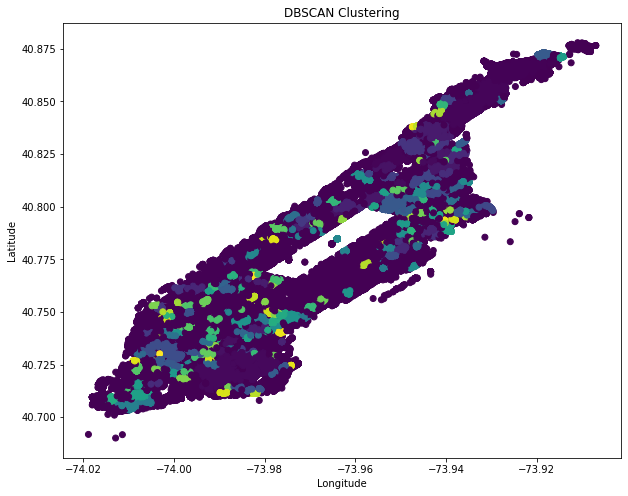

In [139]:
plt.figure(figsize=(10, 8))
plt.scatter(df_dbscan['Longitude'], df_dbscan['Latitude'], c=df_dbscan['Cluster'], cmap='viridis')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('DBSCAN Clustering')

plt.show()

In [140]:
manhattan_map = folium.Map(location=[40.7831, -73.9712], zoom_start=12)

filtered_df = df_dbscan[df_dbscan['Cluster'] != -1]

heatmap_data = filtered_df[['Latitude', 'Longitude']].values
heat_map = HeatMap(heatmap_data)

heat_map.add_to(manhattan_map)

manhattan_map

### Clusters are not optimal for covering all sections of central Manhattan 

# OPTICS Clustering

In [141]:
coords = df[['Latitude', 'Longitude']].values

In [142]:
optics_model = OPTICS(min_samples=100, metric='haversine')

In [143]:
optics_model.fit(np.radians(coords))

/Users/conormcelduff/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_optics.py:932: RuntimeWarning: divide by zero encountered in true_divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


OPTICS(metric='haversine', min_samples=100)

In [144]:
labels = optics_model.labels_

In [145]:
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

In [146]:
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

Estimated number of clusters: 366
Estimated number of noise points: 71600


In [147]:
df['Cluster'] = labels

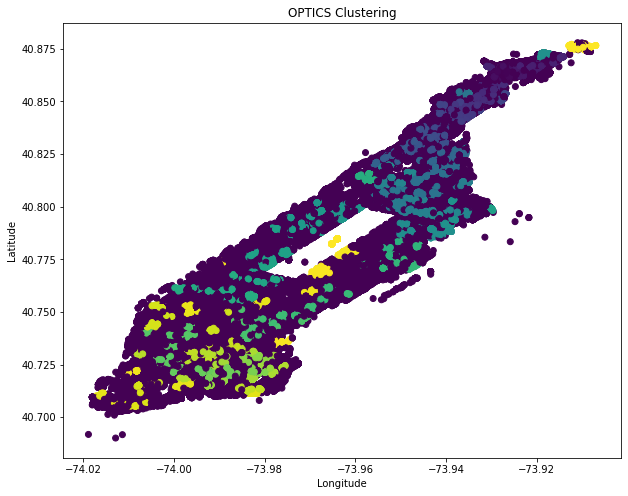

In [149]:
plt.figure(figsize=(10, 8))
plt.scatter(df['Longitude'], df['Latitude'], c=df['Cluster'], cmap='viridis')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('OPTICS Clustering')

plt.show()

In [150]:
manhattan_map = folium.Map(location=[40.7831, -73.9712], zoom_start=12)

filtered_optics = df[df['Cluster'] != -1]

heatmap_data = filtered_optics[['Latitude', 'Longitude']].values
heat_map = HeatMap(heatmap_data)

heat_map.add_to(manhattan_map)

manhattan_map

#### From the onset, OPTICS seems to develop a more detailed approach to clustering the longitude and latitude values within the dataset - The fact we're dealing with 366 clusters as opposed to 200 leads us to believe we have found a more accurate outcome 

In [151]:
complaint_counts = df.groupby(['Cluster', 'Hour', 'Weekday', 'Weekend']).size().reset_index(name='Noise Complaint Count')

In [152]:
df = df.merge(complaint_counts, on=['Cluster', 'Hour', 'Weekday', 'Weekend'], how='left')

In [153]:
df

Created Date          Closed Date           Complaint Type   
0       2017-01-01 00:03:41  2017-01-01 03:49:13      Noise - Residential  \
1       2017-01-01 00:14:06  2017-01-01 02:22:14       Noise - Commercial   
2       2017-01-01 00:17:37  2017-01-01 06:02:22      Noise - Residential   
3       2017-01-01 00:18:10  2017-01-01 05:43:30      Noise - Residential   
4       2017-01-01 00:20:10  2017-01-01 01:30:49  Noise - Street/Sidewalk   
...                     ...                  ...                      ...   
139632  2017-12-30 23:54:20  2017-12-31 03:56:50       Noise - Commercial   
139633  2017-12-30 23:55:59  2017-12-31 02:31:10      Noise - Residential   
139634  2017-12-30 23:58:23  2017-12-31 12:31:59      Noise - Residential   
139635  2017-12-30 23:59:44  2017-12-31 12:54:27      Noise - Residential   
139636  2017-12-30 23:59:49  2017-12-31 05:47:53      Noise - Residential   

              Descriptor               Location Type  Incident Zip   
0       Loud Music/Party  Residential Building/House       10040.0  \
1       Loud Music/Party            Store/Commercial       10011.0   
2       Loud Music/Party  Residential Building/House       10031.0   
3       Loud Music/Party  Residential Building/House       10027.0   
4       Loud Music/Party             Street/Sidewalk       10019.0   
...                  ...                         ...           ...   
139632  Loud Music/Party            Store/Commercial       10031.0   
139633  Banging/Pounding  Residential Building/House       10027.0   
139634  Loud Music/Party  Residential Building/House       10040.0   
139635  Banging/Pounding  Residential Building/House       10025.0   
139636  Loud Music/Party  Residential Building/House       10031.0   

           Incident Address      Street Name    Cross Street 1   
0          60 THAYER STREET    THAYER STREET    SHERMAN AVENUE  \
1        235 WEST 23 STREET   WEST 23 STREET          7 AVENUE   
2       520 WEST 139 STREET  WEST 139 STREET  AMSTERDAM AVENUE   
3       128 WEST 128 STREET  WEST 128 STREET      LENOX AVENUE   
4                       NaN              NaN               NaN   
...                     ...              ...               ...   
139632        3660 BROADWAY         BROADWAY   WEST 151 STREET   
139633  200 WEST 131 STREET  WEST 131 STREET          7 AVENUE   
139634      97 ARDEN STREET     ARDEN STREET      DONGAN PLACE   
139635   310 WEST 95 STREET   WEST 95 STREET   WEST END AVENUE   
139636  598 WEST 152 STREET  WEST 152 STREET  AMSTERDAM AVENUE   

                       Cross Street 2  ...   Latitude  Longitude   
0                            BROADWAY  ...  40.863609 -73.927177  \
1                            8 AVENUE  ...  40.744577 -73.996756   
2                      HAMILTON PLACE  ...  40.821792 -73.951220   
3                            7 AVENUE  ...  40.810108 -73.945088   
4                                 NaN  ...  40.765676 -73.976235   
...                               ...  ...        ...        ...   
139632                WEST 152 STREET  ...  40.830360 -73.947568   
139633                       8 AVENUE  ...  40.812812 -73.945739   
139634                       BROADWAY  ...  40.864175 -73.928561   
139635  HENRY HUDSON PARKWAY ET 11 SB  ...  40.794783 -73.974199   
139636                       BROADWAY  ...  40.830755 -73.947029   

                                        Location Hour Month  Day of Week   
0         (40.8636089229268, -73.92717651087838)    0     1            6  \
1       (40.744576681504476, -73.99675563032027)    0     1            6   
2          (40.82179224368313, -73.951220174454)    0     1            6   
3        (40.81010795620323, -73.94508762577884)    0     1            6   
4        (40.76567588066998, -73.97623531488374)    0     1            6   
...                                          ...  ...   ...          ...   
139632  (40.830359643502725, -73.94756785332217)   23    12            5   
139633   (40.81281181632886, -7

In [155]:
df_cluster = df[df['Cluster'] == 330]
df_cluster

Created Date          Closed Date       Complaint Type   
291     2017-01-01 06:23:38  2017-01-01 03:34:15  Noise - Residential  \
316     2017-01-01 11:01:48  2017-01-01 03:32:06         Noise - Park   
7035    2017-01-22 10:26:00  2017-01-29 11:45:00                Noise   
7037    2017-01-22 10:36:00  2017-01-29 11:45:00                Noise   
7847    2017-01-25 17:40:46  2017-01-25 06:37:21         Noise - Park   
...                     ...                  ...                  ...   
133062  2017-12-07 23:09:00  2017-12-18 11:15:00                Noise   
133175  2017-12-08 07:56:44  2017-12-08 08:01:45         Noise - Park   
137773  2017-12-23 01:40:12  2017-12-23 03:21:31  Noise - Residential   
138481  2017-12-25 08:14:00  2018-01-26 11:15:00                Noise   
139036  2017-12-28 16:46:22  2017-12-28 05:02:28  Noise - Residential   

                                              Descriptor   
291                                         Loud Talking  \
316                                     Loud Music/Party   
7035        Noise: Construction Before/After Hours (NM1)   
7037                 Noise: Construction Equipment (NC1)   
7847                                        Loud Talking   
...                                                  ...   
133062                       Noise: Jack Hammering (NC2)   
133175                                  Loud Music/Party   
137773                                      Loud Talking   
138481  Noise: air condition/ventilation equipment (NV1)   
139036                                      Loud Talking   

                     Location Type  Incident Zip           Incident Address   
291     Residential Building/House       10003.0           23 WAVERLY PLACE  \
316                Park/Playground       10003.0  6 WASHINGTON SQUARE NORTH   
7035                           NaN       10003.0         1 UNIVERSITY PLACE   
7037                           NaN       10003.0                        NaN   
7847               Park/Playground       10003.0  4 WASHINGTON SQUARE NORTH   
...                            ...           ...                        ...   
133062                         NaN       10003.0         5 UNIVERSITY PLACE   
133175             Park/Playground       10003.0  6 WASHINGTON SQUARE NORTH   
137773  Residential Building/House       10003.0         1 UNIVERSITY PLACE   
138481                         NaN       10003.0         1 UNIVERSITY PLACE   
139036  Residential Building/House       10003.0         1 UNIVERSITY PLACE   

                    Street Name           Cross Street 1   Cross Street 2   
291               WAVERLY PLACE            MERCER STREET    GREENE STREET  \
316     WASHINGTON SQUARE NORTH         UNIVERSITY PLACE         5 AVENUE   
7035           UNIVERSITY PLACE          WASHINGTON SQ N  WASHINGTON MEWS   
7037                        NaN                      NaN              NaN   
7847    WASHINGTON SQUARE NORTH         UNIVERSITY PLACE         5 AVENUE   
...                         ...                      ...              ...   
133062         UNIVERSITY PLACE          WASHINGTON SQ N  WASHINGTON MEWS   
133175  WASHINGTON SQUARE NORTH         UNIVERSITY PLACE         5 AVENUE   
137773         UNIVERSITY PLACE  WASHINGTON SQUARE NORTH  WASHINGTON MEWS   
138481         UNIVERSITY PLACE          WASHINGTON SQ N  WASHINGTON MEWS   
139036         UNIVERSITY PLACE  WASHINGTON SQUARE NORTH  WASHINGTON MEWS   

        ...   Latitude  Longitude                                  Location   
291     ...  40.730301 -73.994703  (40.730301147349586, -73.99470332104544)  \
316     ...  40.731020 -73.996165   (40.731020331139526, -73.9961645568844)   
7035    ...  40.730784 -73.995486  (40.730784257614054, -73.99548624427106)   
7037    ...  40.730716 -73.995562    (40.73071564168163, -73.9955620193208)   
7847    ...  40.730924 -73.995966   (40.73092425793301, -73.99596611550221)   
...     ...        ...        ...                                    

=========================================

In [156]:
df['Noise Complaint Count'] = df.groupby(['Cluster', 'Hour', 'Weekend', 'Weekday'])['Complaint Type'].transform('count')

In [157]:
bins = [0, 20, 40, 60, 80, np.inf]

In [158]:
labels = [0, 1, 2, 3, 4]

In [159]:
df['Noise Complaint Category'] = pd.cut(df['Noise Complaint Count'], bins=bins, labels=labels)

In [160]:
df

Created Date          Closed Date           Complaint Type   
0       2017-01-01 00:03:41  2017-01-01 03:49:13      Noise - Residential  \
1       2017-01-01 00:14:06  2017-01-01 02:22:14       Noise - Commercial   
2       2017-01-01 00:17:37  2017-01-01 06:02:22      Noise - Residential   
3       2017-01-01 00:18:10  2017-01-01 05:43:30      Noise - Residential   
4       2017-01-01 00:20:10  2017-01-01 01:30:49  Noise - Street/Sidewalk   
...                     ...                  ...                      ...   
139632  2017-12-30 23:54:20  2017-12-31 03:56:50       Noise - Commercial   
139633  2017-12-30 23:55:59  2017-12-31 02:31:10      Noise - Residential   
139634  2017-12-30 23:58:23  2017-12-31 12:31:59      Noise - Residential   
139635  2017-12-30 23:59:44  2017-12-31 12:54:27      Noise - Residential   
139636  2017-12-30 23:59:49  2017-12-31 05:47:53      Noise - Residential   

              Descriptor               Location Type  Incident Zip   
0       Loud Music/Party  Residential Building/House       10040.0  \
1       Loud Music/Party            Store/Commercial       10011.0   
2       Loud Music/Party  Residential Building/House       10031.0   
3       Loud Music/Party  Residential Building/House       10027.0   
4       Loud Music/Party             Street/Sidewalk       10019.0   
...                  ...                         ...           ...   
139632  Loud Music/Party            Store/Commercial       10031.0   
139633  Banging/Pounding  Residential Building/House       10027.0   
139634  Loud Music/Party  Residential Building/House       10040.0   
139635  Banging/Pounding  Residential Building/House       10025.0   
139636  Loud Music/Party  Residential Building/House       10031.0   

           Incident Address      Street Name    Cross Street 1   
0          60 THAYER STREET    THAYER STREET    SHERMAN AVENUE  \
1        235 WEST 23 STREET   WEST 23 STREET          7 AVENUE   
2       520 WEST 139 STREET  WEST 139 STREET  AMSTERDAM AVENUE   
3       128 WEST 128 STREET  WEST 128 STREET      LENOX AVENUE   
4                       NaN              NaN               NaN   
...                     ...              ...               ...   
139632        3660 BROADWAY         BROADWAY   WEST 151 STREET   
139633  200 WEST 131 STREET  WEST 131 STREET          7 AVENUE   
139634      97 ARDEN STREET     ARDEN STREET      DONGAN PLACE   
139635   310 WEST 95 STREET   WEST 95 STREET   WEST END AVENUE   
139636  598 WEST 152 STREET  WEST 152 STREET  AMSTERDAM AVENUE   

                       Cross Street 2  ...  Longitude   
0                            BROADWAY  ... -73.927177  \
1                            8 AVENUE  ... -73.996756   
2                      HAMILTON PLACE  ... -73.951220   
3                            7 AVENUE  ... -73.945088   
4                                 NaN  ... -73.976235   
...                               ...  ...        ...   
139632                WEST 152 STREET  ... -73.947568   
139633                       8 AVENUE  ... -73.945739   
139634                       BROADWAY  ... -73.928561   
139635  HENRY HUDSON PARKWAY ET 11 SB  ... -73.974199   
139636                       BROADWAY  ... -73.947029   

                                        Location Hour Month Day of Week   
0         (40.8636089229268, -73.92717651087838)    0     1           6  \
1       (40.744576681504476, -73.99675563032027)    0     1           6   
2          (40.82179224368313, -73.951220174454)    0     1           6   
3        (40.81010795620323, -73.94508762577884)    0     1           6   
4        (40.76567588066998, -73.97623531488374)    0     1           6   
...                                          ...  ...   ...         ...   
139632  (40.830359643502725, -73.94756785332217)   23    12           5   
139633   (40.81281181632886, -73.94573926927536)   23    12           5   
139634   (40.86417519602294, -73.92856057230655)   23    12           5   
139635   (40.79478336

In [161]:
X = df[['Longitude', 'Latitude', 'Hour', 'Weekday', 'Weekend']]
y = df['Noise Complaint Category']

In [162]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [163]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)

In [164]:
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [165]:
y_pred = clf.predict(X_test)

In [166]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94      9694
           1       0.98      0.97      0.97      2610
           2       0.98      0.98      0.98       674
           3       1.00      1.00      1.00       213
           4       0.96      0.96      0.96     14737

    accuracy                           0.96     27928
   macro avg       0.97      0.97      0.97     27928
weighted avg       0.96      0.96      0.96     27928



### Accuracy has greatly improved in comparison to the NoiseRank column, XGBoost, Bagging Classifier and AdaBoost Classifier 

In [167]:
predictions = clf.predict(X_test)

In [168]:
new_data = [[-73.94508762577884, 40.81010795620323, 0, 1, 0]]

In [169]:
prediction = clf.predict(new_data)

/Users/conormcelduff/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [170]:
print('Predicted NoiseRank:', prediction[0])

Predicted NoiseRank: 4


### This may need model testing - Expected output here was 1 but actual output was 2?

In [171]:
X_test_sample = [[-73.94508762577884, 40.81010795620323, 0, 1, 0]] # input features for one sample
y_test_sample = [1]  # Replace with the true NoiseRank for this sample

In [172]:
y_pred_sample = clf.predict(X_test_sample)

/Users/conormcelduff/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [173]:
print("True label:", y_test_sample[0])
print("Predicted label:", y_pred_sample[0])

True label: 1
Predicted label: 4


#### On first inspection, our prediction may not be as accurate as the classification report is suggesting - Further analysis is required to ensure Random Forest Classifier is the most suitable model to use

In [174]:
y_pred = clf.predict(X_test)

In [175]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: ", rmse)

r2 = r2_score(y_test, y_pred)
print("R2 score: ", r2)

mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error: ", mae)

Root Mean Squared Error:  0.8090808730072477
R2 score:  0.8142641368205727
Mean Absolute Error:  0.16828988828415928


================================

In [176]:
start_time = time.time()

rf_model = RandomForestClassifier(random_state=42)
rf_model = rf_model.fit(X_train, y_train)

end_time = time.time()

rf_time = end_time - start_time
print(f"Time taken to train Random Forest model : {rf_time} seconds")

Time taken to train Random Forest model : 10.125225067138672 seconds


In [177]:
noise_ranks = rf_model.predict(X_test)

In [178]:
predictions = pd.DataFrame({'Actual': y_test.astype(int).values, 'Predicted': noise_ranks})

In [179]:
print(predictions)

       Actual  Predicted
0           0          0
1           4          4
2           4          4
3           0          0
4           0          0
...       ...        ...
27923       4          4
27924       0          0
27925       4          4
27926       4          4
27927       4          4

[27928 rows x 2 columns]


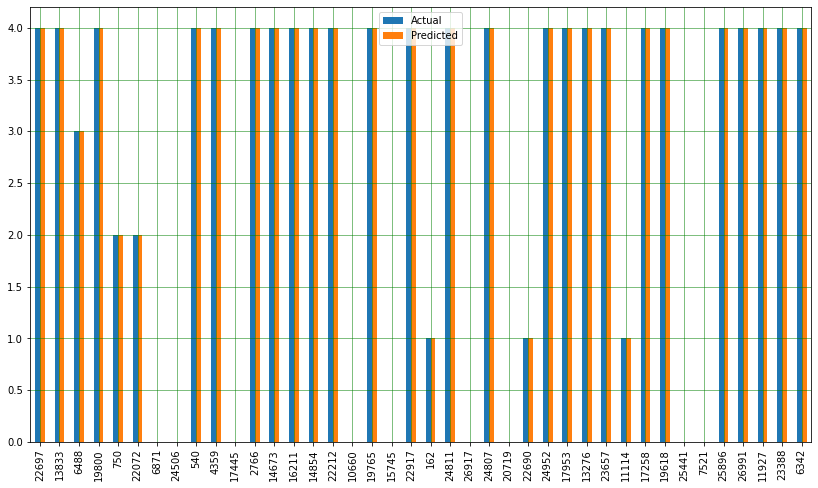

In [180]:
predictions.sample(40).plot(kind='bar',figsize=(14,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

## Logic Regression Model

In [181]:
model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

rmse = mean_squared_error(y_test, y_pred, squared=False)

print("Root Mean Squared Error (RMSE):", rmse)

r2 = r2_score(y_test, y_pred)
print("R-squared score:", r2)

print("Mean absolute error:", mean_absolute_error(y_test, y_pred))

Root Mean Squared Error (RMSE): 2.5283766217574155
R-squared score: -0.8138252014407092
Mean absolute error: 1.6981165855055858


/Users/conormcelduff/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Linear Regression Model

In [182]:
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Root Mean Squared Error (RMSE):", rmse)

r2 = r2_score(y_test, y_pred)
print("R-squared score:", r2)

print("Mean absolute error:", mean_absolute_error(y_test, y_pred))

Root Mean Squared Error (RMSE): 1.836854347728976
R-squared score: 0.042670722867914845
Mean absolute error: 1.7591211512481137


## SVM - Support Vector Model

In [183]:
from sklearn import svm

model_svm = svm.SVR()
model_svm.fit(X_train[:1000], y_train[:1000])

y_pred = model_svm.predict(X_test)

rmse = mean_squared_error(y_test, y_pred, squared=False)
print("SVM - Root Mean Squared Error (RMSE):", rmse)

r2 = r2_score(y_test, y_pred)
print("SVM - R-squared score:", r2)

print("SVM - Mean absolute error:", mean_absolute_error(y_test, y_pred))

SVM - Root Mean Squared Error (RMSE): 2.48274596186793
SVM - R-squared score: -0.7489462718906374
SVM - Mean absolute error: 1.7302060327260935


## KNN - K Nearest Neighbour

In [184]:
from sklearn.neighbors import KNeighborsClassifier

model_knn = KNeighborsClassifier(n_neighbors=5)
model_knn.fit(X_train, y_train)

y_pred = model_knn.predict(X_test)

rmse = mean_squared_error(y_test, y_pred, squared=False)
print("KNN - Root Mean Squared Error (RMSE):", rmse)

r2 = r2_score(y_test, y_pred)
print("KNN - R-squared score:", r2)

print("KNN - Mean absolute error:", mean_absolute_error(y_test, y_pred))

KNN - Root Mean Squared Error (RMSE): 1.531653042526662
KNN - R-squared score: 0.3343702940712332
KNN - Mean absolute error: 0.5948868519048983


## Naive Baynes

In [185]:
from sklearn.naive_bayes import GaussianNB

model_nb = GaussianNB()
model_nb.fit(X_train, y_train)

y_pred = model_nb.predict(X_test)

rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Naive Bayes - Root Mean Squared Error (RMSE):", rmse)

r2 = r2_score(y_test, y_pred)
print("Naive Bayes - R-squared score:", r2)

print("Naive Bayes - Mean absolute error:", mean_absolute_error(y_test, y_pred))

Naive Bayes - Root Mean Squared Error (RMSE): 2.142298831933834
Naive Bayes - R-squared score: -0.3021829409889458
Naive Bayes - Mean absolute error: 1.773345746204526


## XGBoost

In [186]:
import xgboost as xgb

model_xgb = xgb.XGBRegressor(objective ='reg:squarederror', n_estimators=100, learning_rate=0.1)
model_xgb.fit(X_train, y_train)

y_pred = model_xgb.predict(X_test)

rmse = mean_squared_error(y_test, y_pred, squared=False)
print("XGBoost - Root Mean Squared Error (RMSE):", rmse)

r2 = r2_score(y_test, y_pred)
print("XGBoost - R-squared score:", r2)

print("XGBoost - Mean absolute error:", mean_absolute_error(y_test, y_pred))

XGBoost - Root Mean Squared Error (RMSE): 1.3840366604329482
XGBoost - R-squared score: 0.4564905651932447
XGBoost - Mean absolute error: 1.2345835691731688


## Random Forest Classifier

In [212]:
model = RandomForestClassifier(n_estimators = 20, random_state = 36)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Root Mean Squared Error (RMSE):", rmse)

r2 = r2_score(y_test, y_pred)
print("R-squared score:", r2)

print("Mean absolute error:", mean_absolute_error(y_test, y_pred))

Root Mean Squared Error (RMSE): 0.8682345768485642
R-squared score: 0.7861121798754795
Mean absolute error: 0.193246920653108


### Create pkl file with RF model

In [213]:
pkl_filename = "test_noise_model.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(model, file)